# GLCM Cross Transformation

An alternative to GLCM statistics within an image, is to take statistics across images.

With similar requirements to Batched `GLCM`, images participating must be of the same shape.
Combinations are between the Channel Dimension, while independent of the Batch Dimension.

Remember that the expected Input Shape is: **B x H x W x C** or **H x W x C**

In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid

## Read Image

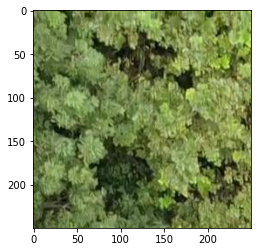

In [2]:
ar = imread("../../../data/image.jpg")[:250, :250]
plt.imshow(ar)

## Theory of Cross GLCM

We find all pair combinations in the channel dimension.

Here, we see that `ar` has 3 channels.

Thus the combinations are
- [Channel 0, Channel 1]
- [Channel 0, Channel 2]
- [Channel 1, Channel 2]

### Combination Order

To inspect the combination order, you can find them using `itertools.combinations`

In [3]:
ar.shape

(250, 250, 3)

In [4]:
from itertools import combinations
list(combinations(range(ar.shape[-1]), 2))

[(0, 1), (0, 2), (1, 2)]

In [5]:
from glcm_cupy import GLCMCross

radius = 2
gc = GLCMCross(bin_from=256, bin_to=16, radius=radius)
ar_gc = gc.run(ar)
print(ar_gc.shape)

GLCM Progress:  94%|█████████▎| 170k/182k [00:00<00:00, 330k Cells/s] 

(246, 246, 3, 7)


As above:
- `ar_gc[:,:,0,:]` corresponds to the cross between Channel 0 and 1.
- `ar_gc[:,:,1,:]` between Channel 0 and 2.
- `ar_gc[:,:,2,:]` between Channel 1 and 2.

## Plot Transformations

Note how we find the pair indices via `itertools.combinations`


Text(0.5, 0.98, 'GLCM Cross Features (Cube Rooted for visibility)')

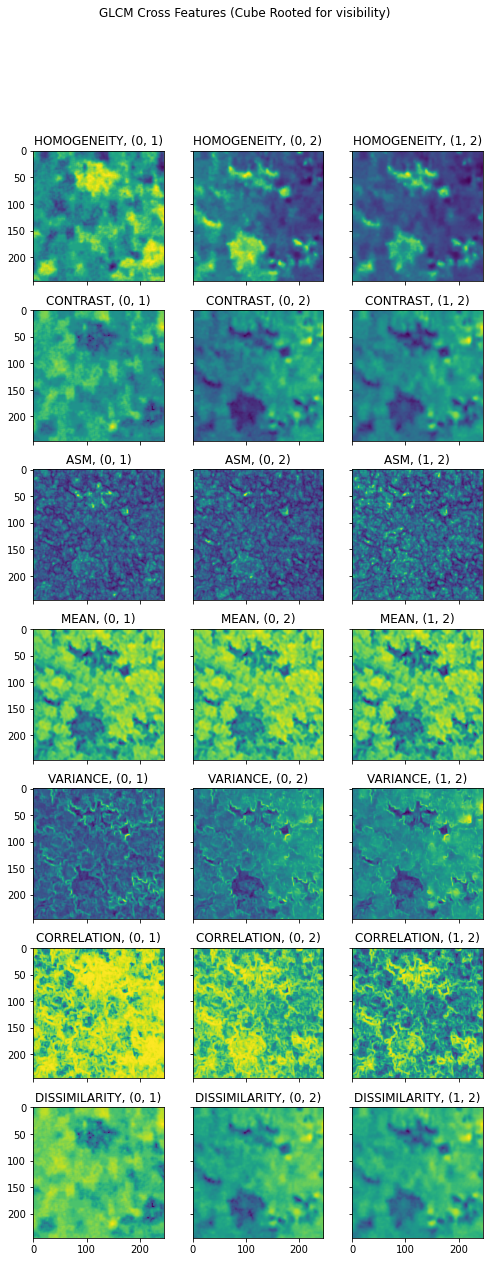

In [6]:
# Plot in a grid
fig = plt.figure(figsize=(15, 20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(7, 3),
                 axes_pad=0.4)

ax_ix = 0
for f_ix, title in zip(range(ar_gc.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    for e_ch_combo, ch_combo in enumerate(combinations(range(ar.shape[-1]), 2)):
        ax = grid[ax_ix]
        ax.imshow(ar_gc[..., e_ch_combo, f_ix] ** (1 / 3))
        ax.set_title(f"{title}, {ch_combo}")
        ax_ix += 1
fig.suptitle('GLCM Cross Features (Cube Rooted for visibility)')

## Summary

- `glcm-cupy` works with batched images, for convenience and a small speed up!